# ICON Data Examples Using pysat

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pds

import pysat

In [3]:
# pysat needs a path to store and load data from
pysat_data_dir = '/Users/russellstoneback/ScienceData'
pysat.utils.set_data_dir(pysat_data_dir)

# ICON IVM Examples

In [4]:
# instantiate IVM Instrument object
# IVM data is automatically cleaned using instrument flags as it is loaded
# levels of 'clean', 'dusty', 'dirty', and 'none' or None are supported
ivm = pysat.Instrument('icon', 'ivm', sat_id='a', clean_level='clean')

/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  after removing the cwd from sys.path.


In [80]:
# set range of dates to get ICON data
start_date = dt.datetime(2020, 1, 1)
stop_date = dt.datetime(2020, 1, 4)

In [6]:
# download data from Berkeley SSL
ivm.download(start_date, stop_date)

In [7]:
# load a day of data
# all code options below will produce the same result

# load by year and day of year
ivm.load(2020, 1)

# load by date instead
# ivm.load(date=dt.datetime(2020, 1, 1))

# load by filename instead
# ivm.load(fname=ivm.files[0])
# ivm.load(fname=ivm.files[dt.datetime(2020, 1, 1)])

## IVM Basic Density Plot

Text(0,0.5,'Log Ion Density (N/cc)')

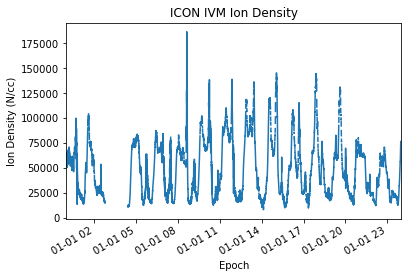

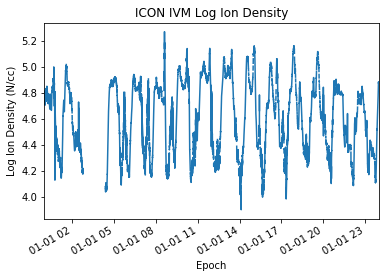

In [8]:
# make basic time series plot of Ion Density

# basic plot of ion density
ivm['Ion_Density'].plot()
plt.title('ICON IVM Ion Density')
plt.ylabel('Ion Density (N/cc)')

# basic plot of the log of ion density
plt.figure()
np.log10(ivm['Ion_Density']).plot()
plt.title('ICON IVM Log Ion Density')
plt.ylabel('Log Ion Density (N/cc)')



## IVM Per-Orbit Density Plots

/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  app.launch_new_instance()


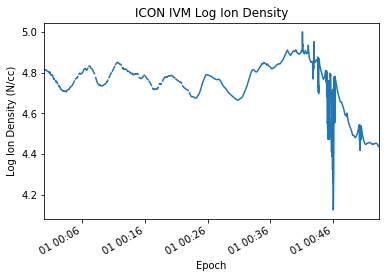

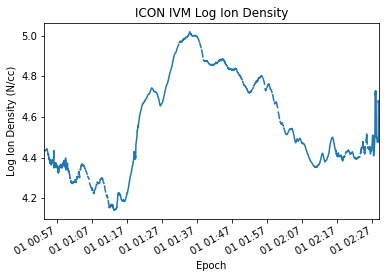

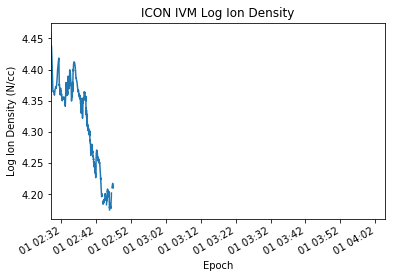

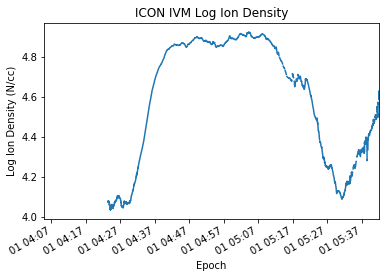

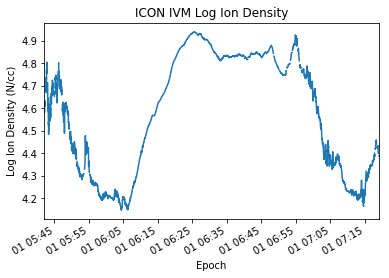

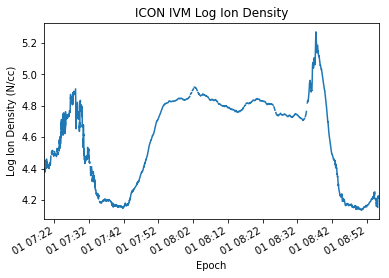

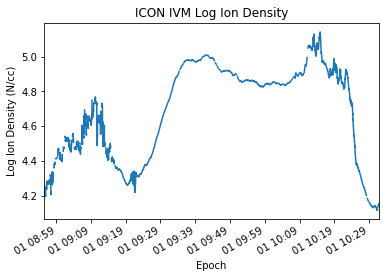

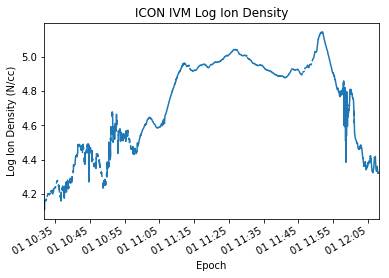

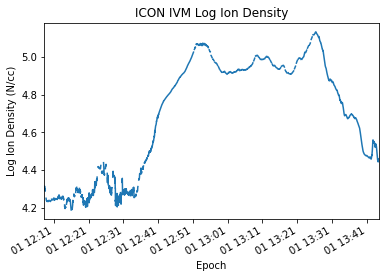

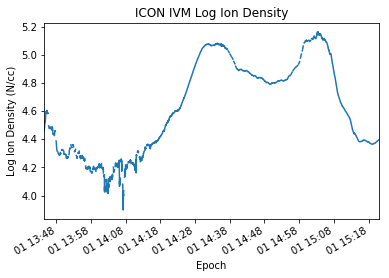

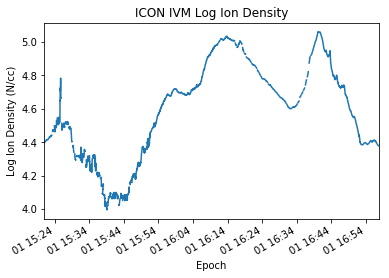

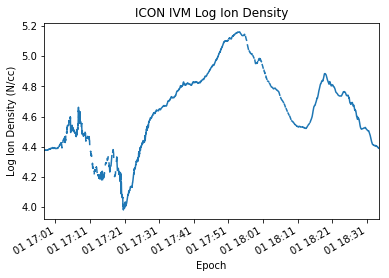

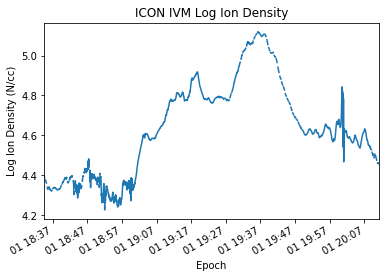

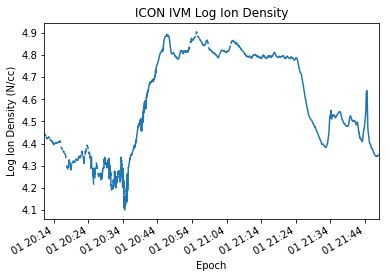

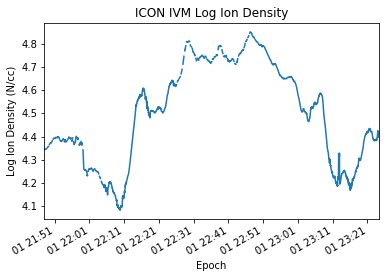

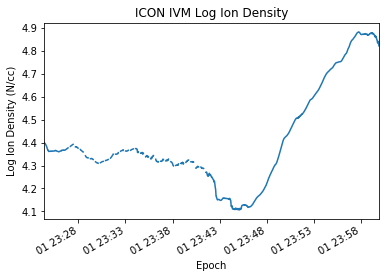

In [25]:
# look at ion density plots orbit by orbit

# set date
date = dt.datetime(2020, 1, 1)

# pysat is able to caculate orbit breaks in real-time
# setup parameters for pysat use
orbit_info = {'kind': 'lt', 'index':'Magnetic_Local_Time'}
# kind sets the type of orbit breakdown, lt for local time
# index sets the variable that will be used for determining orbit breaks

# instantiate ICON IVM Instrument object
# IVM recreated here to ensure robustness as jupyter cells need not be
# executed in order
ivm = pysat.Instrument('icon', 'ivm', sat_id='a', clean_level='clean', 
                       orbit_info=orbit_info)
# set the start and stop dates when iterating over Instrument object
# by default, will iterate over all available data
ivm.bounds = (date, date)

# iterate over the IVM data orbit-by-orbit
# each loop, a single orbit of data found in ivm.data
for ivm in ivm.orbits:
    plt.figure()
    np.log10(ivm['Ion_Density']).plot()
    plt.title('ICON IVM Log Ion Density')
    plt.ylabel('Log Ion Density (N/cc)')



## Summary Plot - Per Orbit Data Breakdown

/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  # This is added back by InteractiveShellApp.init_path()
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: custom.add is deprecated and will be renamed in pysat 3.0.0 as custom.attach


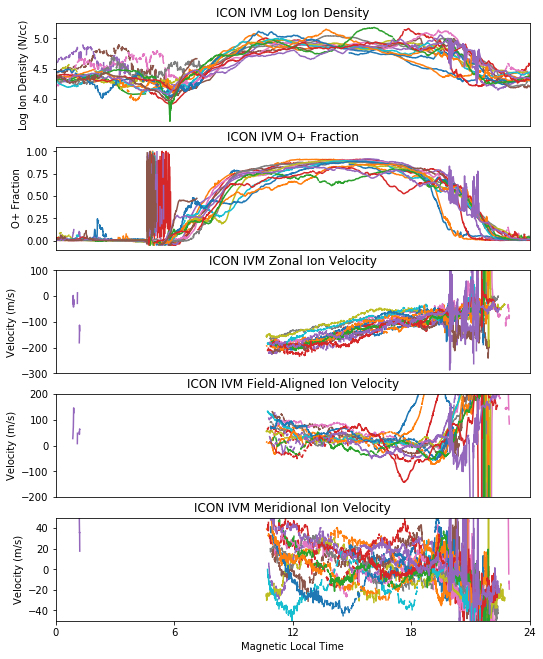

In [26]:
# complete summary plot orbit-by-orbit

# pysat is able to caculate orbit breaks in real-time
# setup parameters for pysat use
orbit_info = {'kind': 'lt', 'index':'Magnetic_Local_Time'}
# kind sets the type of orbit breakdown, lt for local time
# index sets the variable that will be used for determining orbit breaks

# instantiate ICON IVM Instrument object
ivm = pysat.Instrument('icon', 'ivm', sat_id='a', clean_level='clean', 
                       orbit_info=orbit_info)

# set the start and stop dates when iterating over Instrument object
# by default, will iterate over all available data
ivm.bounds = (date, date)

# add Log Ion Density to Instrument object
def add_log_density(inst):
    """Add the log of ion density to inst
    
    Parameters
    ----------
    inst : pysat.Instrument
    
    """
    inst['Log_Ion_Density'] = np.log10(inst['Ion_Density'])
    return

# attach custom function to Instrument object
# this method is applied automatically to the IVM data 
# every time new data is loaded
ivm.custom.add(add_log_density, 'modify')

# create a figure so each orbit is on the same plot
fig, axs = plt.subplots(5, 1, figsize=(8.5,11))

# use pysat functionality to iterate over the data, orbit by orbit
# each loop, a single orbit of data found in ivm.data
for ivm in ivm.orbits:
    ivm.data.plot(x='Magnetic_Local_Time', y='Log_Ion_Density', 
                  xlim=(0,24), xticks=[],
                  ax=axs[0], legend=False)
    axs[0].set_title('ICON IVM Log Ion Density')
    axs[0].set_ylabel('Log Ion Density (N/cc)')
    axs[0].set_xlabel('')

    ivm.data.plot(x='Magnetic_Local_Time', y='Fractional_Ion_Density_O', 
                  xlim=(0,24), xticks=[],
                  ax=axs[1], legend=False)
    axs[1].set_title('ICON IVM O+ Fraction')
    axs[1].set_ylabel('O+ Fraction')
    axs[1].set_xlabel('')

    
    ivm.data.plot(x='Magnetic_Local_Time', y='Ion_Velocity_Zonal', 
                  xlim=(0,24), xticks=[],
                  ylim=(-300, 100),
                  ax=axs[2], legend=False)
    axs[2].set_title('ICON IVM Zonal Ion Velocity')
    axs[2].set_ylabel('Velocity (m/s)')
    axs[2].set_xlabel('')

    ivm.data.plot(x='Magnetic_Local_Time', y='Ion_Velocity_Field_Aligned', 
                  xlim=(0,24), xticks=[],
                  ylim=(-200, 200),
                  ax=axs[3], legend=False)
    axs[3].set_title('ICON IVM Field-Aligned Ion Velocity')
    axs[3].set_ylabel('Velocity (m/s)')
    axs[3].set_xlabel('')

    ivm.data.plot(x='Magnetic_Local_Time', y='Ion_Velocity_Meridional', 
                  xlim=(0,24), xticks=(0,6,12,18,24),
                  ylim=(-50, 50),
                  ax=axs[4], legend=False)
    axs[4].set_title('ICON IVM Meridional Ion Velocity')
    axs[4].set_ylabel('Velocity (m/s)')
    axs[4].set_xlabel('Magnetic Local Time')


# ICON MIGHTI Data Examples

In [17]:
# instantiate pysat.Instrument objects for some of the MIGHTI data products

# MIGHTI Vector wind red
mighti_vw_red = pysat.Instrument('icon', 'mighti', tag='vector_wind_red')
# MIGHTI Vector wind green
mighti_vw_green = pysat.Instrument('icon', 'mighti', tag='vector_wind_green')
# MIGHTI Temperature
mighti_temp_a = pysat.Instrument('icon', 'mighti', tag='temperature', sat_id='a')
mighti_temp_b = pysat.Instrument('icon', 'mighti', tag='temperature', sat_id='b')

# collect into a list
mighti_insts = [mighti_vw_red, mighti_vw_green, mighti_temp_a, mighti_temp_b]

/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  after removing the cwd from sys.path.
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  if __name__ == '__main__':


In [ ]:
# download various MIGHTI data products

# if needed, change levels for logging printout to increase feedback
# more information about logging may be found here
# https://docs.python.org/3/library/logging.html
# pysat.logger.setLevel(1) 

# perform download for each dataset
for inst in mighti_insts:
    inst.download(start_date, stop_date)
    
# change levels for logging printout to decrease feedback
# pysat.logger.setLevel(40)

# MIGHTI Winds Basic Example

/Users/russellstoneback/Code/pysat/pysat/_meta.py:504: UserWarning: Array elements are not allowed in meta. Dropping input : Valid_Range
  key)))


Text(0,0.5,'Altitude (km)')

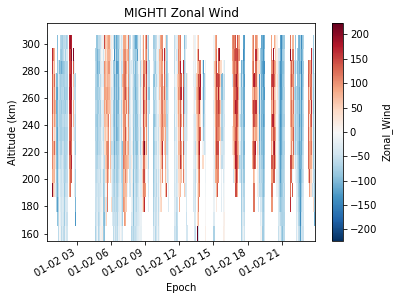

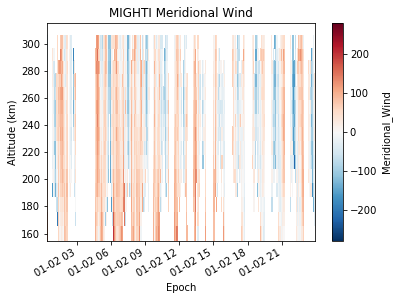

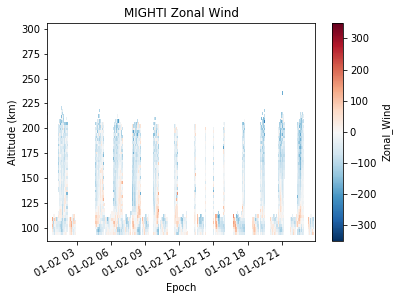

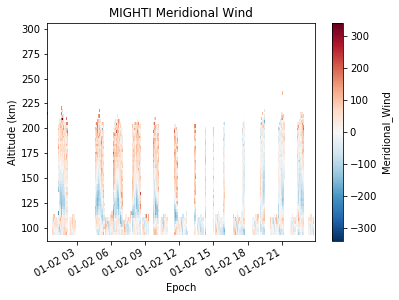

In [18]:
# load day of data
mighti_vw_red.load(2020, 2)
mighti_vw_green.load(2020, 2)

mighti_vw_red['Zonal_Wind'].transpose().plot()
plt.title('MIGHTI Zonal Wind')
plt.ylabel('Altitude (km)')

plt.figure()
mighti_vw_red['Meridional_Wind'].transpose().plot()
plt.title('MIGHTI Meridional Wind')
plt.ylabel('Altitude (km)')

plt.figure()
mighti_vw_green['Zonal_Wind'].transpose().plot()
plt.title('MIGHTI Zonal Wind')
plt.ylabel('Altitude (km)')

plt.figure()
mighti_vw_green['Meridional_Wind'].transpose().plot()
plt.title('MIGHTI Meridional Wind')
plt.ylabel('Altitude (km)')

## MIGHTI Winds Summary Per-Orbit Example


/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: custom.add is deprecated and will be renamed in pysat 3.0.0 as custom.attach


Text(0.5,0,'Profile Average Solar Local Time')

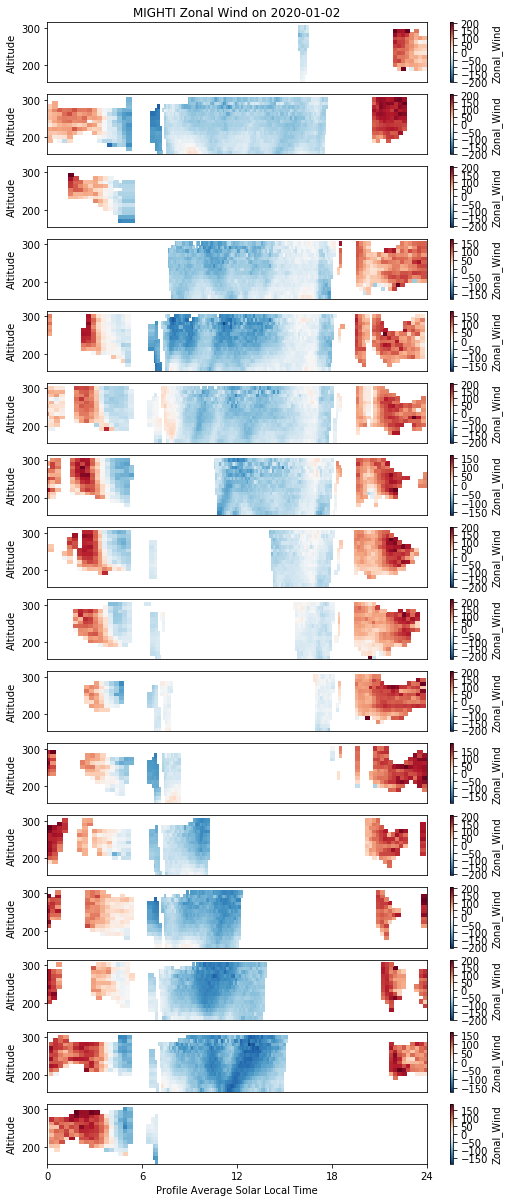

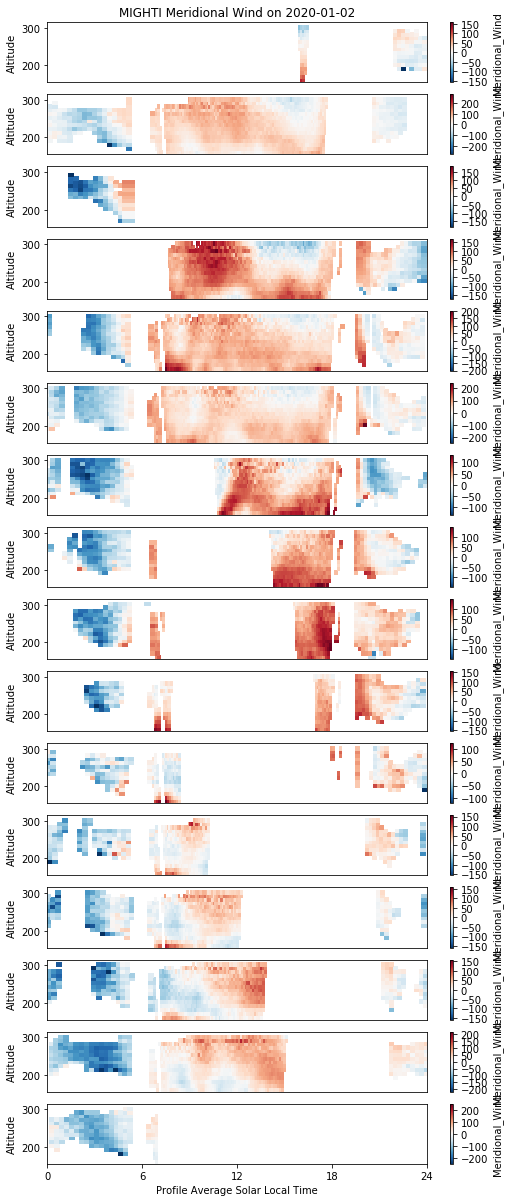

In [20]:
# pick 'red' or 'green' for the line color MIGHTI is using
line_color = 'red'

# set date
date = dt.datetime(2020, 1, 2)

orbit_info = {'kind': 'lt', 'index': 'average_local_time'}

def add_average_local_solar_time(inst):
    """Adds mean profile local solar time as variable """
    # average local time over profile
    inst['average_local_time'] = inst['Local_Solar_Time'].mean(axis=1)
    idx, = np.where(~inst['average_local_time'].isnull())
    inst.data = inst[idx]
    return
    
# MIGHTI Vector Wind
mighti_vw_color = pysat.Instrument('icon', 'mighti', tag='vector_wind_' + line_color,
                                 orbit_info=orbit_info)
# confine orbit calculation to user set date
mighti_vw_color.bounds = (date, date)
# add calculation of profile average local time
mighti_vw_color.custom.add(add_average_local_solar_time, 'modify')

# create a figure so each orbit is on the same plot
fig, axs = plt.subplots(16, 1, figsize=(8.5,21))
figm, axsm = plt.subplots(16, 1, figsize=(8.5,21))


for i, mighti_vw_color in enumerate(mighti_vw_color.orbits):
    # enable support for plotting local_time on x-axis
    alt = ("Epoch", mighti_vw_color['average_local_time'])
    # zonal wind
    a = mighti_vw_color.data['Zonal_Wind'].assign_coords(average_local_time=alt)
    # make plot
    a.transpose().plot(ax=axs[i], x='average_local_time', y='Altitude')
    axs[i].set_xlim((0, 24))
    axs[i].set_xticks([])
    axs[i].set_xlabel('')

    # meridional wind
    a = mighti_vw_color.data['Meridional_Wind'].assign_coords(average_local_time=alt)
    # make plot
    a.transpose().plot(ax=axsm[i], x='average_local_time', y='Altitude')
    axsm[i].set_xlim((0, 24))
    axsm[i].set_xticks([])
    axsm[i].set_xlabel('')


axs[0].set_title('MIGHTI Zonal Wind on ' + date.strftime('%Y-%m-%d'))
axs[-1].set_xticks([0, 6, 12, 18, 24])
axs[-1].set_xlabel('Profile Average Solar Local Time')

axsm[0].set_title('MIGHTI Meridional Wind on ' + date.strftime('%Y-%m-%d'))
axsm[-1].set_xticks([0, 6, 12, 18, 24])
axsm[-1].set_xlabel('Profile Average Solar Local Time')

## MIGHTI Temperature Example

/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  # This is added back by InteractiveShellApp.init_path()
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: custom.add is deprecated and will be renamed in pysat 3.0.0 as custom.attach


Text(0.5,0,'Profile Average Solar Local Time')

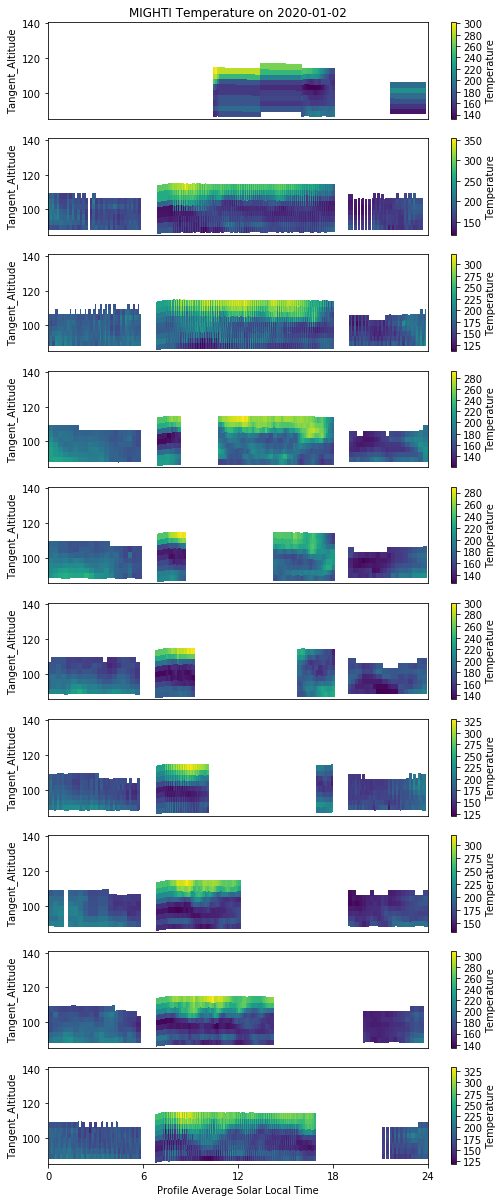

In [23]:
# pick 'a' or 'b' for the MIGHTI instrument
sat_id = 'a'

# set date
date = dt.datetime(2020, 1, 2)

orbit_info = {'kind': 'lt', 'index': 'average_local_time'}
    
# MIGHTI Temperature
mighti = pysat.Instrument('icon', 'mighti', tag='temperature',
                                   sat_id=sat_id, orbit_info=orbit_info)
# confine orbit calculation to user set date
mighti.bounds = (date, date)

def add_average_tangent_solar_time(inst):
    """Adds mean profile local solar time as variable """
    # average local time over profile
    inst['average_local_time'] = inst['Tangent_Local_Solar_Time'].mean(axis=0)
    idx, = np.where(~inst['average_local_time'].isnull())
    inst.data = inst[idx]
    return
# add method
mighti.custom.add(add_average_tangent_solar_time, 'modify')

# create figure
first_loop = True
for i, mighti in enumerate(mighti.orbits):    
    # create figure on first loop
    # we now know how many orbits in the day
    if first_loop:
        fig, axs = plt.subplots(mighti.orbits.num, 1, figsize=(8.5,21))
        first_loop = False
    
    # enable support for plotting local_time on x-axis
    slt = ("Epoch", mighti['average_local_time'])
    # enable support for plotting tangent altitude on y axis
    alt = (("Alt", "Epoch"), mighti['Tangent_Altitude'])
    # apply coordinates 
    a = mighti.data['Temperature'].assign_coords(average_local_time=slt,
                                                Tangent_Altitude=alt)
    # ensure local time is monotonically increasing
    a = a.sortby(mighti['average_local_time'])
    # make plot
    a.transpose().plot(ax=axs[i], x='average_local_time', y='Tangent_Altitude')
    axs[i].set_xlim((0, 24))
    axs[i].set_xticks([])
    axs[i].set_xlabel('')

# Set title and outermost x axis label
axs[0].set_title('MIGHTI Temperature on ' + date.strftime('%Y-%m-%d'))
axs[-1].set_xticks([0, 6, 12, 18, 24])
axs[-1].set_xlabel('Profile Average Solar Local Time')

# ICON FUV Example


In [29]:
# download various FUV data products

# if needed, change levels for logging printout to increase feedback
# more information about logging may be found here
# https://docs.python.org/3/library/logging.html
pysat.logger.setLevel(1) 

fuv_day = pysat.Instrument('icon', 'fuv', tag='day')
fuv_night = pysat.Instrument('icon', 'fuv', tag='night')

# combine into list
fuv_insts = [fuv_day, fuv_night]

# perform download for each dataset
for inst in fuv_insts:
    inst.download(start_date, stop_date)
    
# change levels for logging printout to decrease feedback
pysat.logger.setLevel(40)


pysat.instruments.icon_fuv INFO: This is a data product from the NASA Ionospheric Connection Explorer mission, an Explorer launched at 21:59:45 EDT on October 10, 2019.

Guidelines for the use of this product are described in the ICON Rules of the Road  (https://http://icon.ssl.berkeley.edu/Data).

Responsibility for the mission science falls to the Principal Investigator, Dr. Thomas Immel at UC Berkeley:
Immel, T.J., England, S.L., Mende, S.B. et al. Space Sci Rev (2018) 214: 13. https://doi.org/10.1007/s11214-017-0449-2

Responsibility for the validation of the L1 data products falls to the instrument lead investigators/scientists.
* EUV: Dr. Eric Korpela :  https://doi.org/10.1007/s11214-017-0384-2
 * FUV: Dr. Harald Frey : https://doi.org/10.1007/s11214-017-0386-0
* MIGHTI: Dr. Christoph Englert : https://doi.org/10.1007/s11214-017-0358-4, and https://doi.org/10.1007/s11214-017-0374-4
* IVM: Dr. Roderick Heelis : https://doi.org/10.1007/s11214-017-0383-3

 Responsibility for the va

pysat INFO: Found 4 of them.
pysat INFO: Updating instrument object bounds.


/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  del sys.path[0]
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: custom.add is deprecated and will be renamed in pysat 3.0.0 as custom.attach


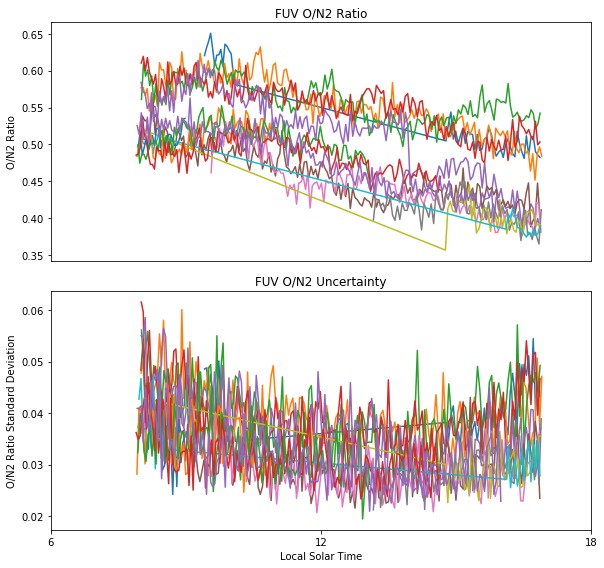

In [32]:
# complete summary plot orbit-by-orbit

date = dt.datetime(2020, 1, 2)

# pysat is able to caculate orbit breaks in real-time
# setup parameters for pysat use
orbit_info = {'kind': 'lt', 'index': 'Local_Solar_Time_Disk'}
# kind sets the type of orbit breakdown, lt for local time
# index sets the variable that will be used for determining orbit breaks

# instantiate ICON IVM Instrument object
fuv = pysat.Instrument('icon', 'fuv', tag='day', clean_level='clean', 
                       orbit_info=orbit_info)

# filter out areas with no disk_ON2
def filter_no_measurement_areas(inst):
    """Remove all measurements for times 'disk_ON2'==0"""
    inst.data = inst.data.where(inst['disk_ON2'] > 0, drop=True)
    return

# attach filter to object
fuv.custom.add(filter_no_measurement_areas, 'modify')

# set the start and stop dates when iterating over Instrument object
# by default, will iterate over all available data
fuv.bounds = (date, date)

# create a figure so each orbit is on the same plot
fig, axs = plt.subplots(2, 1, figsize=(8.5,8))

for ax in axs:
    ax.set_xlim((6, 18))
    ax.set_xlabel('')
    ax.set_xticks([])
    
# use pysat functionality to iterate over the data, orbit by orbit
# each loop, a single orbit of data found in ivm.data
for fuv in fuv.orbits:
    
    # disk_ON2
    axs[0].plot(fuv['Local_Solar_Time_Disk'], fuv['disk_ON2']) 
    axs[0].set_title('FUV O/N2 Ratio')
    axs[0].set_ylabel('O/N2 Ratio')
    
    # disk_sigma_ON2
    axs[1].plot(fuv['Local_Solar_Time_Disk'], fuv['disk_sigma_ON2']) 
    axs[1].set_title('FUV O/N2 Uncertainty')
    axs[1].set_ylabel('O/N2 Ratio Standard Deviation')

axs[-1].set_xticks((6, 12, 18))
axs[-1].set_xlabel('Local Solar Time')
fig.tight_layout()

/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  if sys.path[0] == '':
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: custom.add is deprecated and will be renamed in pysat 3.0.0 as custom.attach
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: custom.add is deprecated and will be renamed in pysat 3.0.0 as custom.attach
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: custom.add is deprecated and will be renamed in pysat 3.0.0 as custom.attach
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: custom.add is deprecate

Text(0.5,1,'O+ Profile Density')

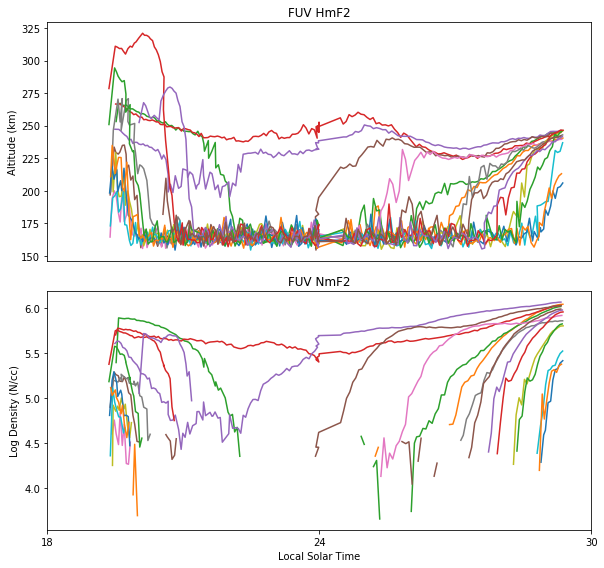

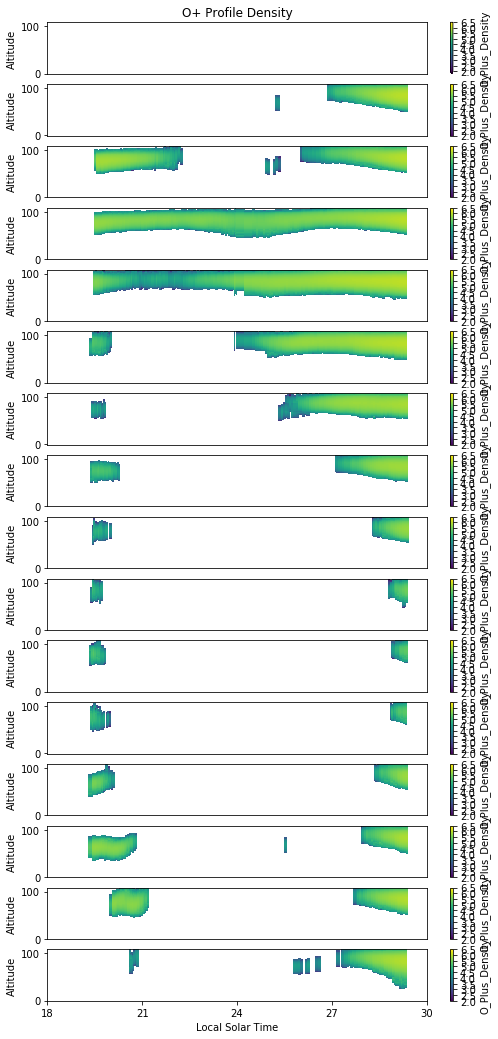

In [104]:
# complete summary plot orbit-by-orbit
date = dt.datetime(2020, 1, 2)

# pysat is able to caculate orbit breaks in real-time
# setup parameters for pysat use
orbit_info = {'kind': 'lt', 'index': 'maximum_local_time'}
# kind sets the type of orbit breakdown, lt for local time
# index sets the variable that will be used for determining orbit breaks

# instantiate ICON IVM Instrument object
fuv = pysat.Instrument('icon', 'fuv', tag='night', clean_level='clean', 
                       orbit_info=orbit_info)

# get simpler local time signal
def add_max_stripe_local_time(inst):
    """Add maximum local time over stripes"""
    inst['maximum_local_time'] = inst['Local_Solar_Time'].max(axis=1)
    return

# remove NmF2 values that aren't likely to be geophysical
def filter_low_nmf2(inst, min_value=1.E2):
    """Filter out low NmF2 values"""
    inst['NMF2'] = inst['NMF2'].where(inst['NMF2'] > min_value)
    return

# make midnight the focus
def shift_local_time(inst):
    """Shifts local times from 0-24 to 12-36"""
    idx, = np.where(inst['maximum_local_time'] < 12.)
    inst[idx, 'maximum_local_time'] += 24.
    return

# remove O+ density values not likely to be geophysical
def filter_o_profile(inst, min_value=1.E2):
    """Filter out low profile values"""
    inst['O_Plus_Density'] = inst['O_Plus_Density'].where(inst['O_Plus_Density'] > min_value)
    return

# attach custom methods to object
fuv.custom.add(add_max_stripe_local_time, 'modify')
fuv.custom.add(filter_low_nmf2, 'modify', min_value=1.E1)
fuv.custom.add(shift_local_time, 'modify')
fuv.custom.add(filter_o_profile, 'modify')

# set the start and stop dates when iterating over Instrument object
# by default, will iterate over all available data
fuv.bounds = (date, date)

# create a figure for each product
fig, axs = plt.subplots(2, 1, figsize=(8.5,8))
# create a larger plot for O+ density profiles
fig_o, axs_o = plt.subplots(16, 1, figsize=(8.5,18))

# set some basic plot properties here
for ax in axs:
    ax.set_xlim((18, 30))
    ax.set_xlabel('')
    ax.set_xticks([])
    
# use pysat functionality to iterate over the data, orbit by orbit
# each loop, a single orbit of data found in ivm.data
for i, fuv in enumerate(fuv.orbits):
    
    # average of HmF2 over FUV stripes
    axs[0].plot(fuv['maximum_local_time'], fuv['HMF2'].mean(axis=1)) 
    axs[0].set_title('FUV HmF2')
    axs[0].set_ylabel('Altitude (km)')
    
    # average of NmF2 over FUV stripes
    axs[1].plot(fuv['maximum_local_time'], np.log10(fuv['NMF2'].mean(axis=1))) 
    axs[1].set_title('FUV NmF2')
    axs[1].set_ylabel('Log Density (N/cc)')
    
    # make nice plot of O+ profiles over altitude
    a = fuv['O_Plus_Density'].mean(axis=2).transpose()
    # enable support for plotting local time on x axis
    slt = ("Epoch", fuv['maximum_local_time'])
    # apply coordinates 
    a = a.assign_coords(maximum_local_time=slt)
    # sort things out
    a = a.sortby('maximum_local_time')
    # make plot
    np.log10(a).plot(x='maximum_local_time', y='Altitude', vmin=2., vmax=6.5,
                    ax=axs_o[i], xlim=(18, 30), xticks=[])
    axs_o[i].set_xlabel('')
    
# labels for HmF2 and NmF2 plots
axs[-1].set_xticks((18, 24, 30))
axs[-1].set_xlabel('Local Solar Time')
fig.tight_layout()

# labels for O+ profile plots
axs_o[-1].set_xticks((18, 21, 24, 27, 30))
axs_o[-1].set_xlabel('Local Solar Time')
axs_o[0].set_title('O+ Profile Density')


# ICON EUV Data

In [81]:
# download EUV data products

# if needed, change levels for logging printout to increase feedback
# more information about logging may be found here
# https://docs.python.org/3/library/logging.html
pysat.logger.setLevel(1) 

# instantiate EUV pysat.Instrument
euv = pysat.Instrument('icon', 'euv')

# download
euv.download(start_date, stop_date)
    
# change levels for logging printout to decrease feedback
pysat.logger.setLevel(40)

pysat.instruments.icon_euv INFO: This is a data product from the NASA Ionospheric Connection Explorer mission, an Explorer launched at 21:59:45 EDT on October 10, 2019.

Guidelines for the use of this product are described in the ICON Rules of the Road  (https://http://icon.ssl.berkeley.edu/Data).

Responsibility for the mission science falls to the Principal Investigator, Dr. Thomas Immel at UC Berkeley:
Immel, T.J., England, S.L., Mende, S.B. et al. Space Sci Rev (2018) 214: 13. https://doi.org/10.1007/s11214-017-0449-2

Responsibility for the validation of the L1 data products falls to the instrument lead investigators/scientists.
* EUV: Dr. Eric Korpela :  https://doi.org/10.1007/s11214-017-0384-2
 * FUV: Dr. Harald Frey : https://doi.org/10.1007/s11214-017-0386-0
* MIGHTI: Dr. Christoph Englert : https://doi.org/10.1007/s11214-017-0358-4, and https://doi.org/10.1007/s11214-017-0374-4
* IVM: Dr. Roderick Heelis : https://doi.org/10.1007/s11214-017-0383-3

 Responsibility for the va

/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  if sys.path[0] == '':


Text(0.5,1,'ICON EUV O+ Density Profile')

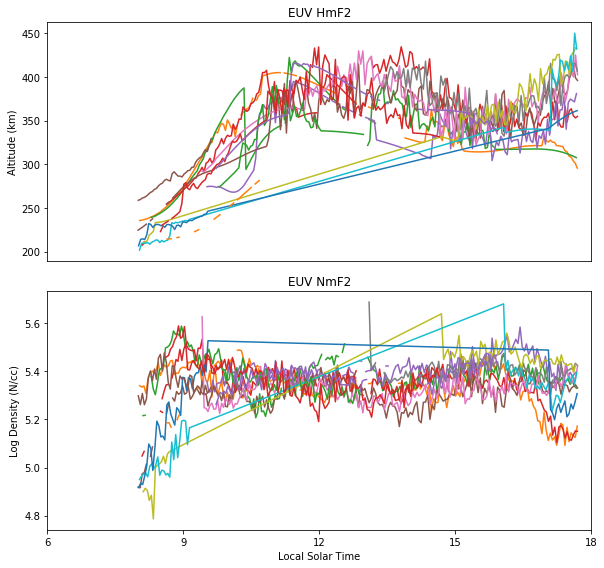

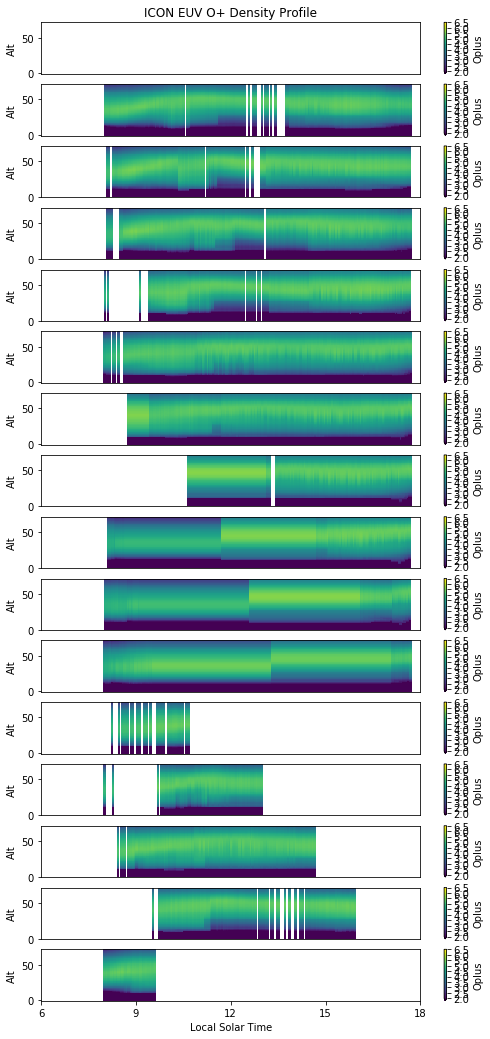

In [103]:
# complete summary plot orbit-by-orbit
date = dt.datetime(2020, 1, 1)

# pysat is able to caculate orbit breaks in real-time
# setup parameters for pysat use
orbit_info = {'kind': 'lt', 'index': 'Local_Solar_Time'}
# kind sets the type of orbit breakdown, lt for local time
# index sets the variable that will be used for determining orbit breaks

# instantiate ICON IVM Instrument object
euv = pysat.Instrument('icon', 'euv', clean_level='clean', 
                       orbit_info=orbit_info)

# set the start and stop dates when iterating over Instrument object
# by default, will iterate over all available data
euv.bounds = (date, date)

# create a figure for each product
fig, axs = plt.subplots(2, 1, figsize=(8.5,8))
# create a larger plot for O+ density profiles
fig_o, axs_o = plt.subplots(16, 1, figsize=(8.5,18))

# set some basic plot properties here
for ax in axs:
    ax.set_xlim((6, 18))
    ax.set_xlabel('')
    ax.set_xticks([])
    
# use pysat functionality to iterate over the data, orbit by orbit
# each loop, a single orbit of data found in ivm.data
for i, euv in enumerate(euv.orbits):
    
    # average of HmF2 over FUV stripes
    axs[0].plot(euv['Local_Solar_Time'], euv['HmF2']) 
    axs[0].set_title('EUV HmF2')
    axs[0].set_ylabel('Altitude (km)')
    
    # average of NmF2 over FUV stripes
    axs[1].plot(euv['Local_Solar_Time'], np.log10(euv['NmF2'])) 
    axs[1].set_title('EUV NmF2')
    axs[1].set_ylabel('Log Density (N/cc)')
    
    # make nice plot of O+ profiles over altitude
    a = euv['Oplus']
    # enable support for plotting local time on x axis
    slt = ("Epoch", euv['Local_Solar_Time'])
    # apply coordinates 
    a = a.assign_coords(Local_Solar_Time=slt)
    # sort things out
    a = a.sortby('Local_Solar_Time')
    # make plot
    np.log10(a).plot(x='Local_Solar_Time', y='Alt', vmin=2., vmax=6.5,
                    ax=axs_o[i], xlim=(6, 18), xticks=[])
    axs_o[i].set_xlabel('')
    
# labels for HmF2 and NmF2 plots
axs[-1].set_xticks((6, 9, 12, 15, 18))
axs[-1].set_xlabel('Local Solar Time')
fig.tight_layout()

# labels for O+ profile plots
axs_o[-1].set_xticks((6, 9, 12, 15, 18))
axs_o[-1].set_xlabel('Local Solar Time')
axs_o[0].set_title('ICON EUV O+ Density Profile')